In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.1.0'

In [2]:
keras.__version__


'2.2.4-tf'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape


(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [7]:
class_names[y_train[0]]


'Coat'

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1



True

In [19]:
weights, biases = hidden1.get_weights()
weights




array([[ 0.06019031,  0.01513834, -0.01500878, ..., -0.04537861,
        -0.03762497, -0.05548324],
       [ 0.0481792 ,  0.00711174, -0.04754713, ...,  0.02204601,
         0.0068235 ,  0.01504365],
       [ 0.029147  , -0.04737985,  0.03102755, ..., -0.04118712,
         0.0132729 , -0.03969758],
       ...,
       [-0.07259653, -0.05983565, -0.00233666, ...,  0.04302547,
        -0.0014599 ,  0.06828435],
       [-0.06918684, -0.05270748,  0.00316256, ...,  0.05663006,
         0.01658869, -0.06237809],
       [-0.03540869, -0.03555262,  0.03513446, ..., -0.07374234,
         0.04492264, -0.00445321]], dtype=float32)

In [ ]:
weights.shape

biases

biases.shape


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))



Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.7107 - accuracy: 0.7679 - val_loss: 0.5042 - val_accuracy: 0.8308
Epoch 2/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4836 - accuracy: 0.8318 - val_loss: 0.4533 - val_accuracy: 0.8442
Epoch 3/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4399 - accuracy: 0.8453 - val_loss: 0.4211 - val_accuracy: 0.8534
Epoch 4/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4133 - accuracy: 0.8547 - val_loss: 0.3954 - val_accuracy: 0.8590
Epoch 5/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3928 - accuracy: 0.8625 - val_loss: 0.3822 - val_accuracy: 0.8668
Epoch 6/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3777 - accuracy: 0.8661 - val_loss: 0.3771 - val_accuracy: 0.8684
Epoch 7/30
55000/55000 [==============================] -

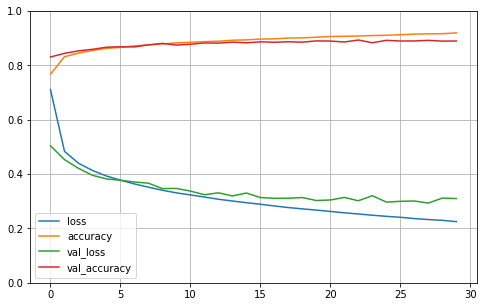

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [23]:
model.evaluate(X_test, y_test)


10000/10000 [==============================] - 0s 39us/sample - loss: 0.3424 - accuracy: 0.8818


[0.3424001827120781, 0.8818]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
y_pred


array([9, 2, 1], dtype=int64)

In [27]:
import numpy as np
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)